In [1]:
from pyts.approximation import SymbolicAggregateApproximation
import matplotlib.pyplot as plt 
from scipy.stats import norm
import numpy as np 
import matplotlib.lines as mlines

In [2]:
n_samples, n_timestamps = 100, 96

In [3]:
rng = np.random.RandomState(42)
X = rng.randn(n_samples, n_timestamps)

Text(0, 0.5, 'x')

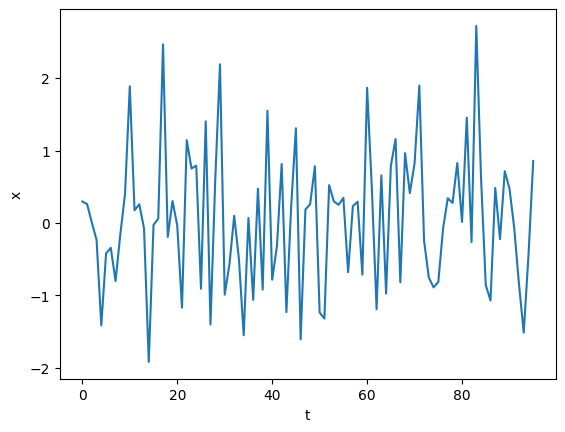

In [4]:
plt.plot(X[1, :])
plt.xlabel('t')
plt.ylabel('x')

In [5]:
# Sax transform
n_bins = 5
sax = SymbolicAggregateApproximation(n_bins=n_bins, strategy='normal')

In [6]:
X_sax = sax.fit_transform(X)

In [7]:
X_sax[1,:]

array(['d', 'd', 'c', 'c', 'a', 'b', 'b', 'b', 'c', 'd', 'e', 'c', 'd',
       'c', 'a', 'c', 'c', 'e', 'c', 'd', 'c', 'a', 'e', 'd', 'd', 'a',
       'e', 'a', 'd', 'e', 'a', 'b', 'c', 'b', 'a', 'c', 'a', 'd', 'a',
       'e', 'b', 'b', 'd', 'a', 'c', 'e', 'a', 'c', 'd', 'd', 'a', 'a',
       'd', 'd', 'c', 'd', 'b', 'c', 'd', 'b', 'e', 'd', 'a', 'd', 'a',
       'd', 'e', 'b', 'e', 'd', 'd', 'e', 'c', 'b', 'a', 'b', 'c', 'd',
       'd', 'd', 'c', 'e', 'b', 'e', 'd', 'a', 'a', 'd', 'c', 'd', 'd',
       'c', 'a', 'a', 'b', 'e'], dtype='<U1')

In [8]:
bins = norm.ppf(np.linspace(0, 1, n_bins+1)[1:-1])
bottom_bool = np.r_[True, X_sax[0, 1:] > X_sax[0, :-1]]

In [12]:
X_sax[0, 1:]

array(['c', 'd', 'e', 'c', 'c', 'e', 'd', 'b', 'd', 'b', 'b', 'c', 'a',
       'a', 'b', 'a', 'd', 'a', 'a', 'e', 'c', 'c', 'a', 'b', 'c', 'a',
       'd', 'b', 'b', 'b', 'e', 'c', 'a', 'd', 'a', 'c', 'a', 'a', 'c',
       'd', 'c', 'c', 'b', 'a', 'b', 'b', 'e', 'd', 'a', 'd', 'b', 'b',
       'd', 'e', 'e', 'b', 'b', 'd', 'e', 'b', 'c', 'a', 'a', 'd', 'e',
       'c', 'e', 'd', 'b', 'd', 'e', 'c', 'e', 'a', 'd', 'c', 'b', 'c',
       'a', 'c', 'd', 'e', 'b', 'b', 'b', 'e', 'd', 'b', 'd', 'c', 'e',
       'b', 'b', 'b', 'a'], dtype='<U1')

In [13]:
X_sax[0, :-1]

array(['d', 'c', 'd', 'e', 'c', 'c', 'e', 'd', 'b', 'd', 'b', 'b', 'c',
       'a', 'a', 'b', 'a', 'd', 'a', 'a', 'e', 'c', 'c', 'a', 'b', 'c',
       'a', 'd', 'b', 'b', 'b', 'e', 'c', 'a', 'd', 'a', 'c', 'a', 'a',
       'c', 'd', 'c', 'c', 'b', 'a', 'b', 'b', 'e', 'd', 'a', 'd', 'b',
       'b', 'd', 'e', 'e', 'b', 'b', 'd', 'e', 'b', 'c', 'a', 'a', 'd',
       'e', 'c', 'e', 'd', 'b', 'd', 'e', 'c', 'e', 'a', 'd', 'c', 'b',
       'c', 'a', 'c', 'd', 'e', 'b', 'b', 'b', 'e', 'd', 'b', 'd', 'c',
       'e', 'b', 'b', 'b'], dtype='<U1')

In [11]:
bins
bottom_bool = np.r_[True, X_sax[0, 1:] > X_sax[0, :-1]]
print(bottom_bool)

[ True False  True  True False False  True False False  True False False
  True False False  True False  True False False  True False False False
  True  True False  True False False False  True False False  True False
  True False False  True  True False False False False  True False  True
 False False  True False False  True  True False False False  True  True
 False  True False False  True  True False  True False False  True  True
 False  True False  True False False  True False  True  True  True False
 False False  True False False  True False  True False False False False]


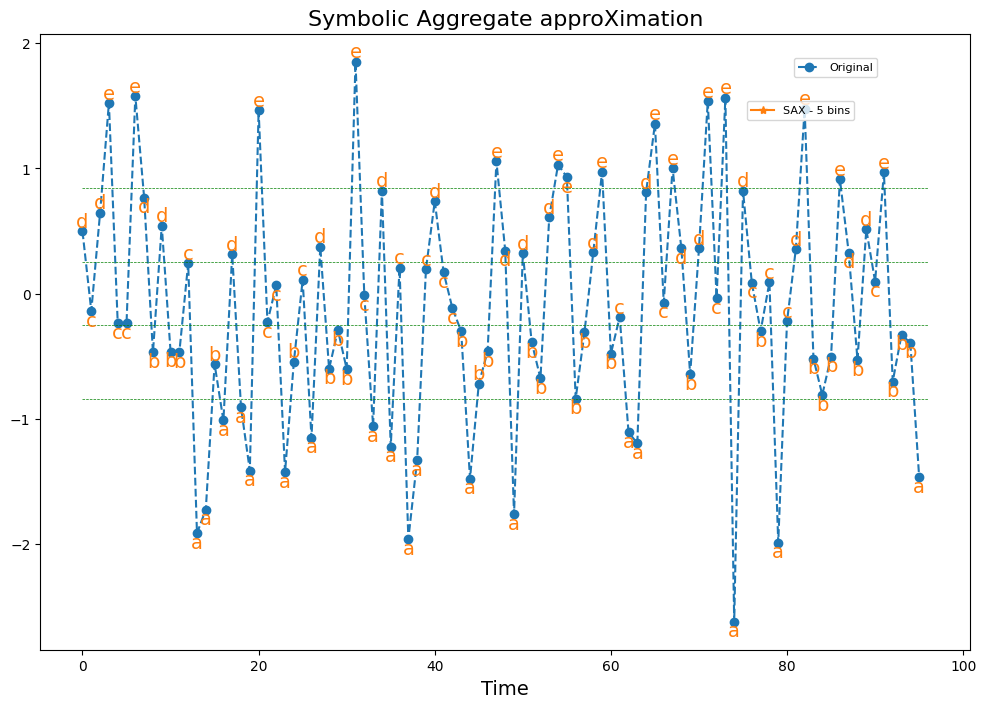

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(X[0], 'o--', label='Original')
for x, y, s, bottom in zip(range(n_timestamps), X[0], X_sax[0], bottom_bool):
    va = 'bottom' if bottom else 'top'
    plt.text(x, y, s, ha='center', va=va, fontsize=14, color='#ff7f0e')
plt.hlines(bins, 0, n_timestamps, color='g', linestyles='--', linewidth=0.5)
sax_legend = mlines.Line2D([], [], color='#ff7f0e', marker='*',
                           label='SAX - {0} bins'.format(n_bins))
first_legend = plt.legend(handles=[sax_legend], fontsize=8, loc=(0.76, 0.86))
ax = plt.gca().add_artist(first_legend)
plt.legend(loc=(0.81, 0.93), fontsize=8)
plt.xlabel('Time', fontsize=14)
plt.title('Symbolic Aggregate approXimation', fontsize=16)
plt.show()